In [1]:
import dask

In [2]:
import dask.dataframe as dd

In [3]:
import pandas as pd
import sys

In [4]:
import numpy as np

In [5]:
sys.path.append('/Users/pradap/Documents/Research/Python-Package/scaling/dmagellan/')

In [6]:
from dask.distributed import Client

In [7]:
from dask.diagnostics import Profiler, ResourceProfiler, CacheProfiler, ProgressBar, progress

In [8]:
client = Client()

In [16]:
dda = dd.read_csv('citeseer.csv', blocksize=1000000, encoding='latin-1',
                 dtype={'journal':object, 'month':object, 'year':object, 'publication_type':object})

In [10]:
# dda.persist()

In [21]:
ll = list(dda.columns)

In [23]:
ll.index('title')

1

In [17]:
with ProgressBar():
    rng = list(range(len(dda)))

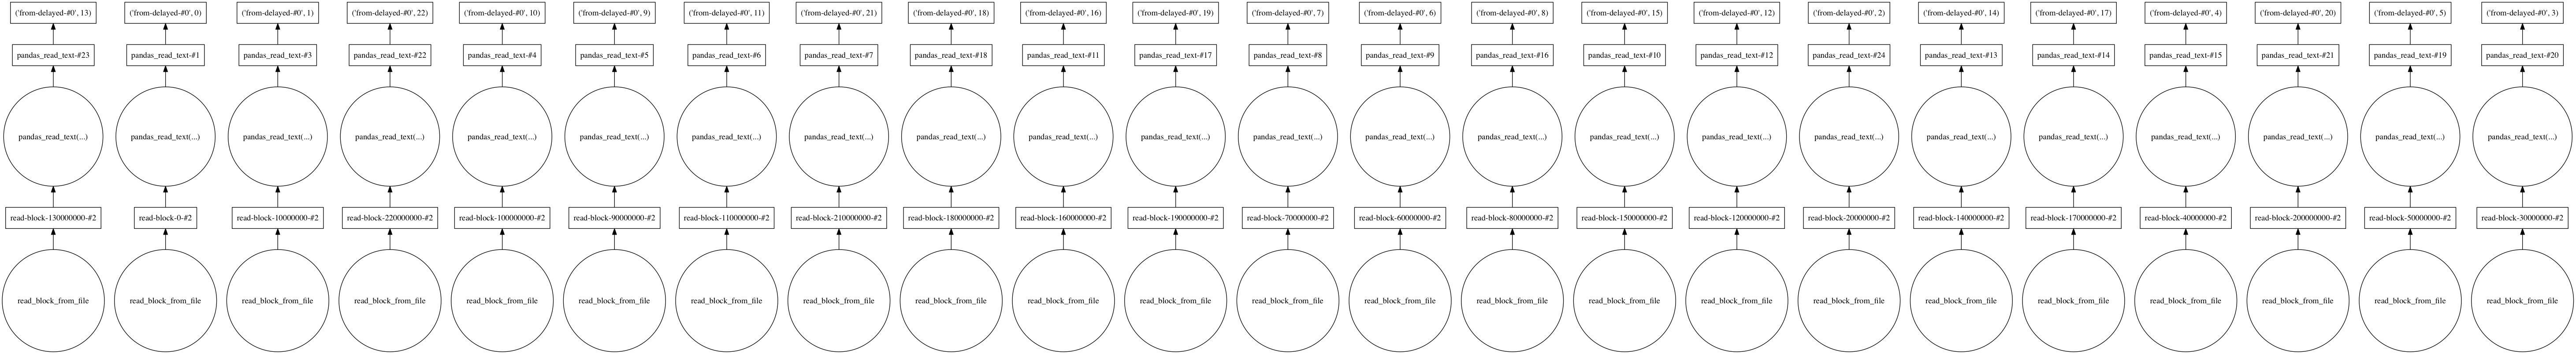

In [22]:
dda.visualize()

In [9]:
locs = np.random.choice(rng, size=200000, replace=False)

In [15]:
from dask.diagnostics import Profiler, ResourceProfiler, CacheProfiler, ProgressBar

In [18]:
ddf_selected = dda.map_partitions(lambda x: x[x.id.isin(locs)])

In [20]:
with Profiler() as prof, ResourceProfiler(dt=0.25) as rprof, CacheProfiler() as cprof:
    ds = ddf_selected.compute()

In [141]:
prof.visualize()

Figure(id='b30a9bb1-4958-4428-b48f-b9e9a074fc11', ...)

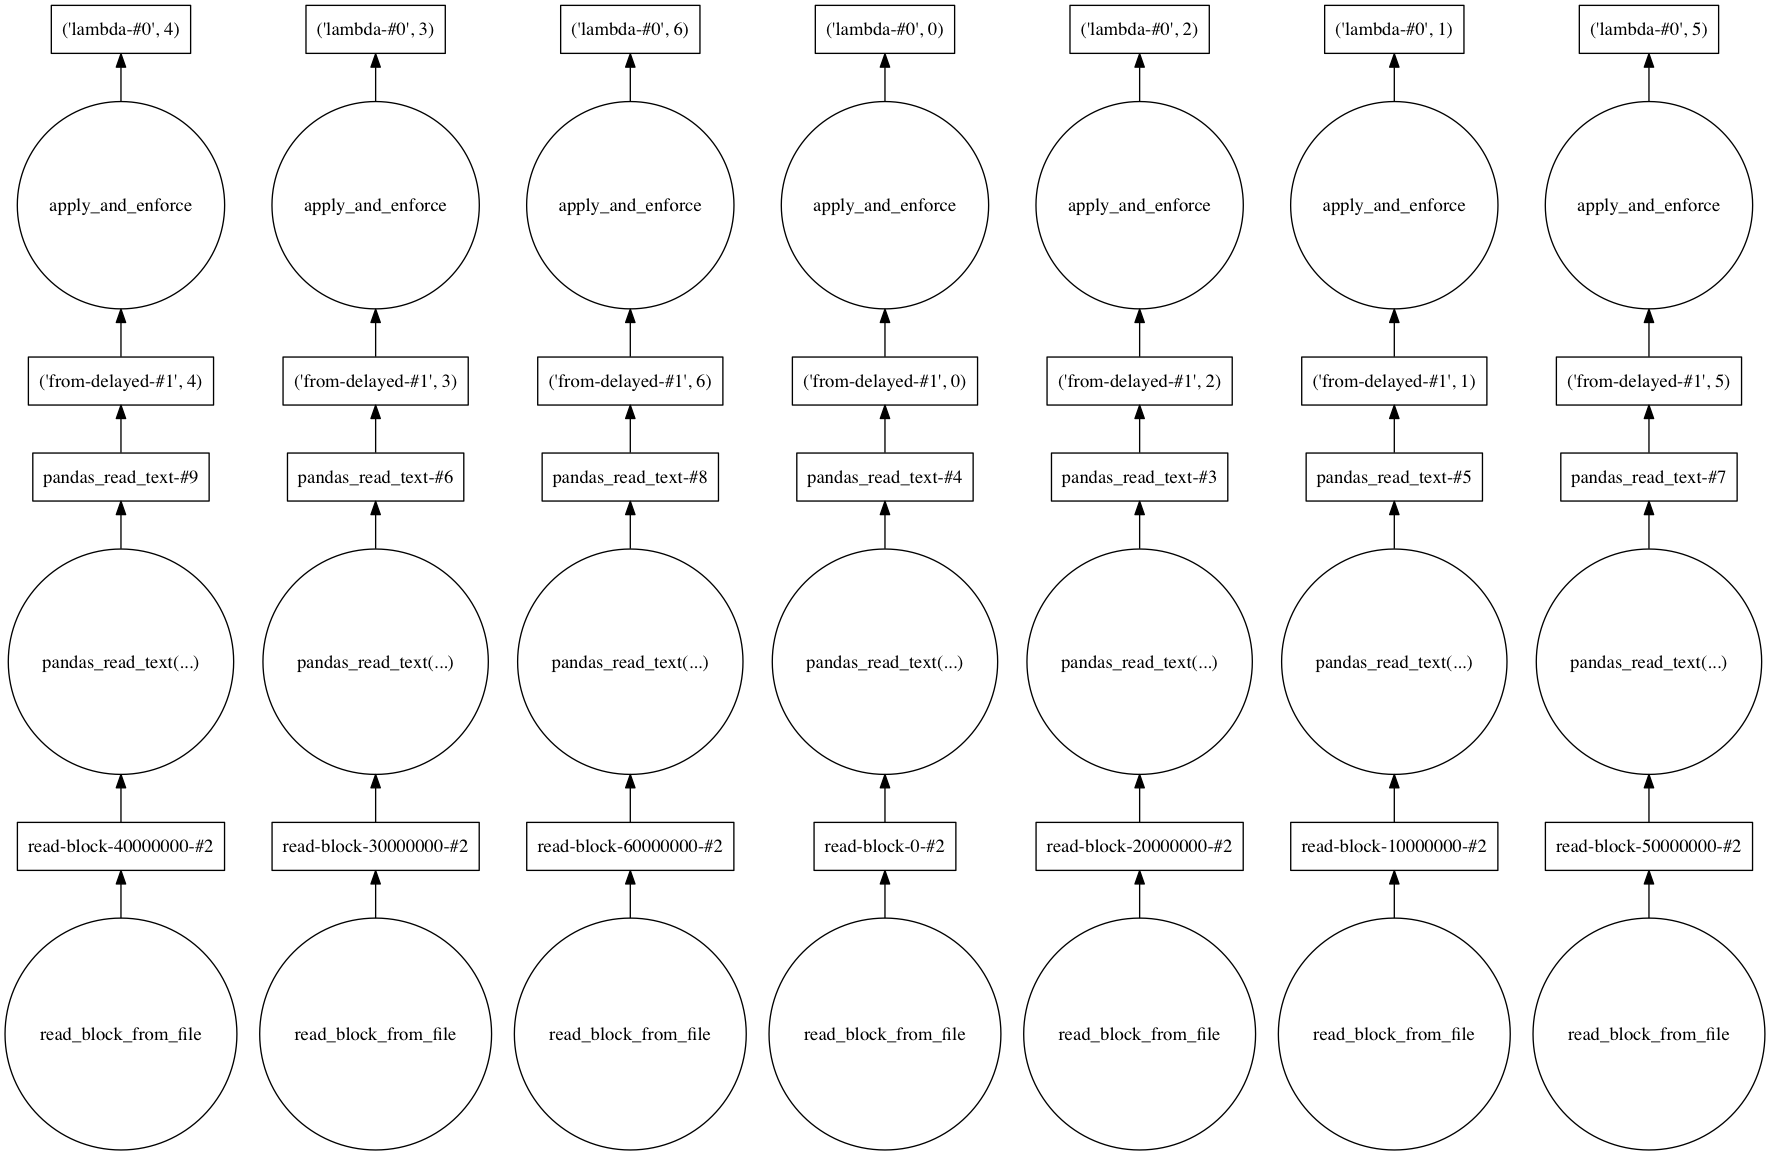

In [134]:
ddf_selected.visualize()

In [123]:
ds = ddf_selected.compute()

In [119]:
len(ds)

100000

In [120]:
ds.

,id,title,year,length,budget,rating,votes,r1,r2,r3,...,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
12,12,#140Characters: A Documentary About Twitter,2011,30.0,NaN,7.7,9.0,14.5,0.0,0.0,...,0.0,45.5,NaN,0,0,0,0,1,0,1
33,33,#7,2009,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,1,0,0,1
37,37,#8 Tire on the Ice,2009,4.0,NaN,6.0,8.0,14.5,0.0,14.5,...,14.5,24.5,NaN,0,0,1,0,0,0,1
43,43,#Anatomy of the Romantic Comedy,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,1,0,0,0,1
50,50,#BeRobin the Movie,2015,41.0,NaN,6.6,8.0,34.5,0.0,0.0,...,0.0,64.5,NaN,0,0,0,0,1,0,0


In [82]:
bb = dda.loc[0:5]

In [83]:
cc = bb.compute()

In [89]:
dda.where

<bound method DataFrame.where of Dask DataFrame Structure:
                  id   title   year   length   budget   rating    votes       r1       r2       r3       r4       r5       r6       r7       r8       r9      r10    mpaa Action Animation Comedy  Drama Documentary Romance  Short
npartitions=7                                                                                                                                                                                                                      
None           int64  object  int64  float64  float64  float64  float64  float64  float64  float64  float64  float64  float64  float64  float64  float64  float64  object  int64     int64  int64  int64       int64   int64  int64
None             ...     ...    ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...     ...    ...       ...    ...    ...         ...     ...    ...
...              ...     ... 

In [54]:
for x in p0.itertuples():
    print(x[1:])
    break
    pass

(0, '#', 2012, 15.0, 10000.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0, 0, 1, 0, 0, 0, 1)


In [55]:
%time xx = dda.map_partitions(preprocess_table)

CPU times: user 12.2 ms, sys: 3.24 ms, total: 15.4 ms
Wall time: 13.6 ms


In [56]:
help(dda.map_partitions)

Help on method map_partitions in module dask.dataframe.core:

map_partitions(self, func, *args, **kwargs) method of dask.dataframe.core.DataFrame instance
    Apply Python function on each DataFrame partition.
    
    Parameters
    ----------
    func : function
        Function applied to each partition.
    args, kwargs :
        Arguments and keywords to pass to the function. The partition will
        be the first argument, and these will be passed *after*.
    meta : pd.DataFrame, pd.Series, dict, iterable, tuple, optional
        An empty ``pd.DataFrame`` or ``pd.Series`` that matches the dtypes
        and column names of the output. This metadata is necessary for
        many algorithms in dask dataframe to work.  For ease of use, some
        alternative inputs are also available. Instead of a ``DataFrame``,
        a ``dict`` of ``{name: dtype}`` or iterable of ``(name, dtype)``
        can be provided. Instead of a series, a tuple of ``(name, dtype)``
        can be used. 

In [57]:
%time kk = xx.compute()

CPU times: user 7.1 s, sys: 1.92 s, total: 9.02 s
Wall time: 5.95 s


In [58]:
from dmagellan.core.stringcontainer import StringContainer
import string
def get_str_cols(dataframe):
    return dataframe.columns[dataframe.dtypes == 'object']
def preprocess_table(dataframe):
    str_cols = list(get_str_cols(dataframe))
    proj_df = dataframe[str_cols]
    concat_strings = []
    str_container = StringContainer()
    str2bytes = lambda x: x if isinstance(x, bytes) else x.encode('utf-8')
    for row in proj_df.itertuples():
        idx = row[0]
        column_values = row[1:]
        strs = [column_value.strip() for column_value in column_values if not pd.isnull(column_value)]
        joined_row = ' '.join(strs)
        joined_row = joined_row.translate(None, string.punctuation)
        concat_strings.append(joined_row.lower())
        str_container.push_back(str2bytes(joined_row.lower()))
    return str_container

In [59]:
strcols = list(get_str_cols(A))

In [60]:
proj_df = dda.get_partition(0)[strcols]

KeyError: "[u'episode' u'song' u'artists'] not in index"

In [24]:
%load_ext cython

In [30]:
%%cython
#distutils: language=c++
from libcpp.vector cimport vector

def tmp():
    cdef vector[int] v
    cdef int i, n
    n = 10
    for i in xrange(n):
        v.push_back(int())

In [31]:
tmp()